In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import math
from scipy.stats import boxcox

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [25]:
#for c in range(df.shape[1]):
#    df.columns[c] = df.columns[c].strip()
    

#df.columns[3] = 'Life expectancy'
#[x.title().strip() for x in df.columns]

df = df.rename(str.strip, axis='columns')
df = df.rename(str.lower, axis='columns')

In [26]:
def explore(var):
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    sns.distplot(df[var].dropna(), kde=False)

    plt.subplot(1,2,2)
    sns.scatterplot(df['life expectancy'], df[var])

    plt.show()

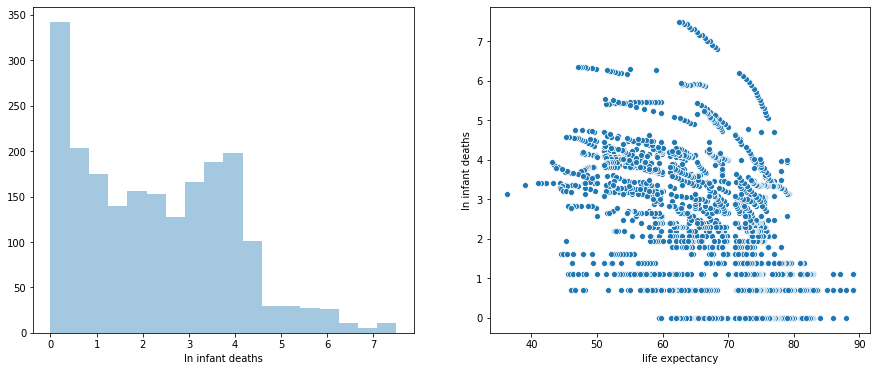

In [27]:
def make_log(var, keepzeroes=False):
    count=0
    newvar = 'ln ' + var
    for i in range(len(df)):
        if df.loc[i,var] == 0:
            if keepzeroes:
                count += 1
                df.loc[i,newvar] = .001
            else:
                count += 1
                df.loc[i,newvar] = None
        else:
            df.loc[i, newvar] = math.log(float(df.loc[i,var]))

make_log('infant deaths')
explore('ln infant deaths')

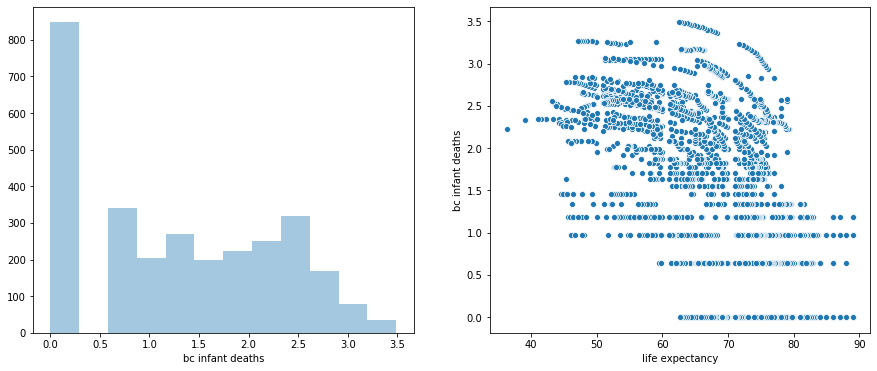

In [28]:
bc_infantdeaths,_ = boxcox(df['infant deaths']+1)
df['bc infant deaths'] = bc_infantdeaths

explore('bc infant deaths')

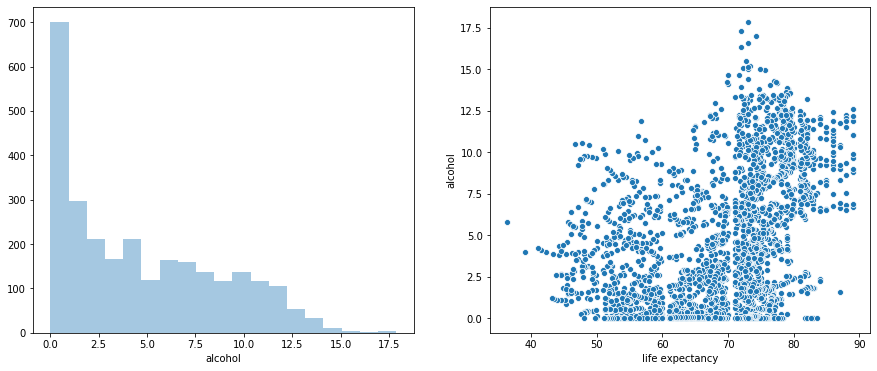

In [29]:
explore('alcohol')

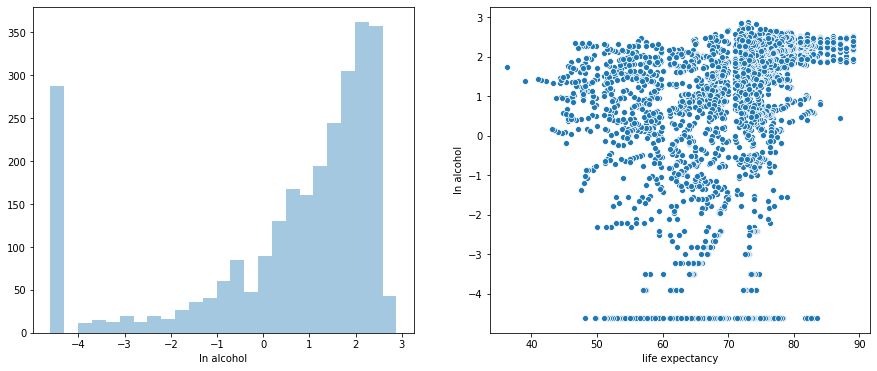

In [30]:
make_log('alcohol')

explore('ln alcohol')

0


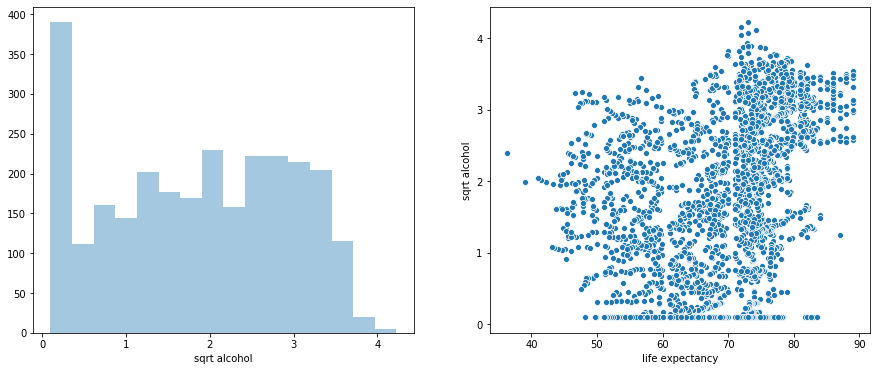

In [31]:
count=0
for i in range(len(df)):
    if df.loc[i,'alcohol'] < 0:
        count += 1
        df.loc[i,'sqrt alcohol'] = -math.sqrt(abs(df.loc[i,'alcohol']))
    else:
        df.loc[i,'sqrt alcohol'] = math.sqrt(float(df.loc[i,'alcohol']))
        
print(count)

explore('sqrt alcohol')

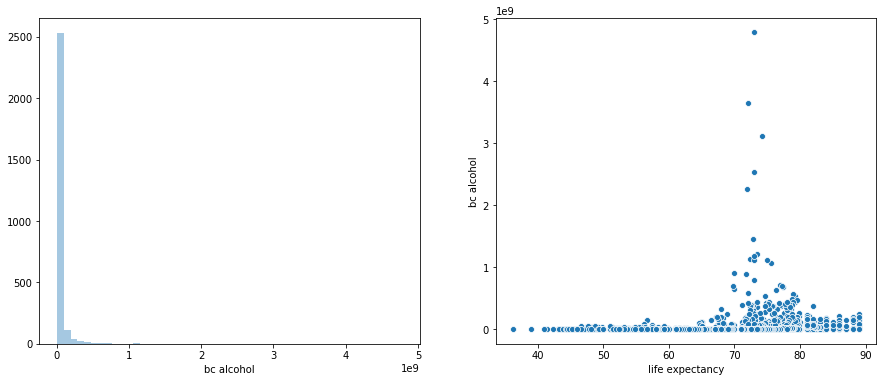

In [32]:
bc_alcohol,_ = boxcox(df['alcohol'])
df['bc alcohol'] = bc_alcohol

explore('bc alcohol')


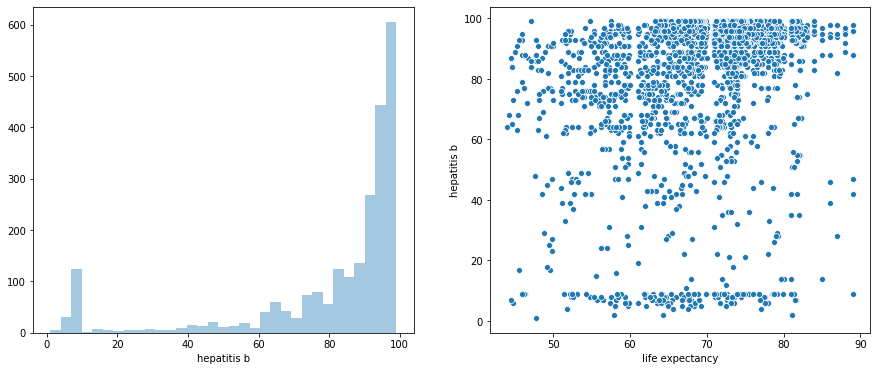

In [33]:
explore('hepatitis b')

In [34]:
max(df['hepatitis b'])

99.0

It's difficult to provide intuition for that result. It looks like the variable is topcoded at 99, which would make sense if the variable is a percentage, but 99% of a country having Hepatitis B seems absurd.

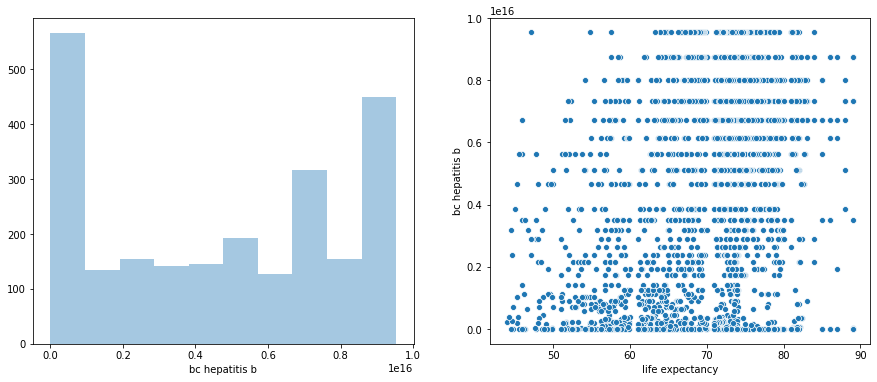

In [35]:
df['bc hepatitis b'],_ = boxcox(df['hepatitis b'])
explore('bc hepatitis b')

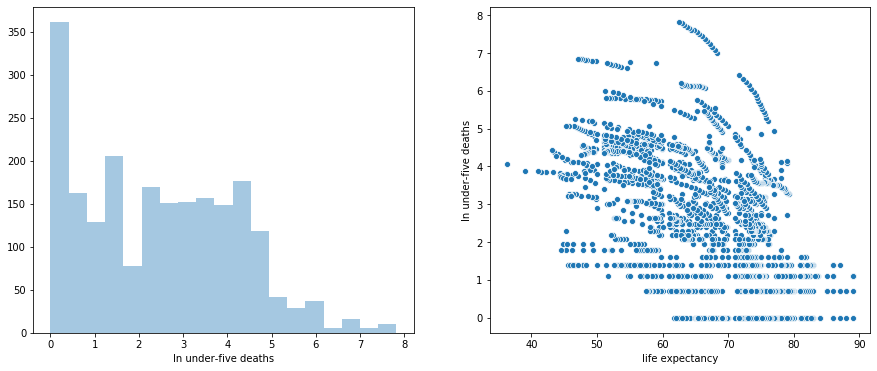

In [36]:
make_log('under-five deaths')

explore('ln under-five deaths')

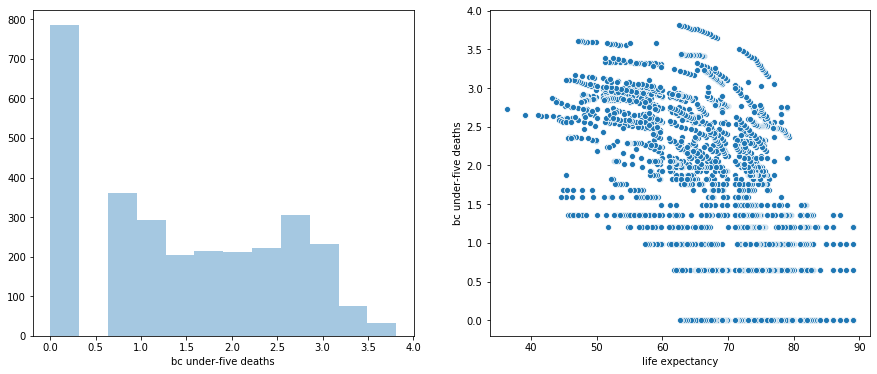

In [37]:
df['bc under-five deaths'],_ = boxcox(df['under-five deaths']+1)
explore('bc under-five deaths')

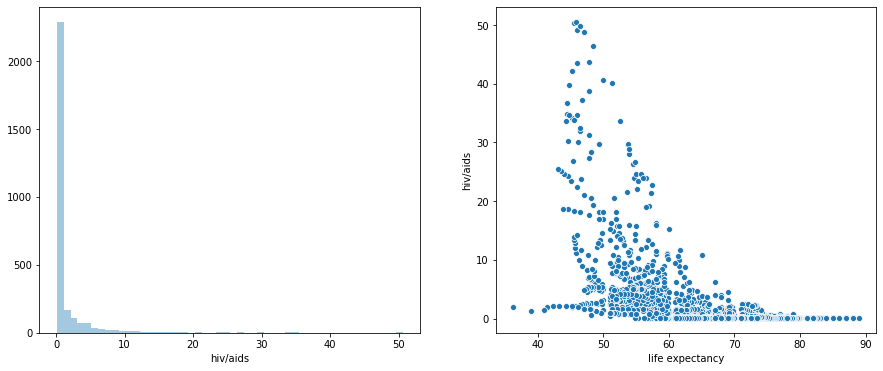

In [38]:
explore('hiv/aids')

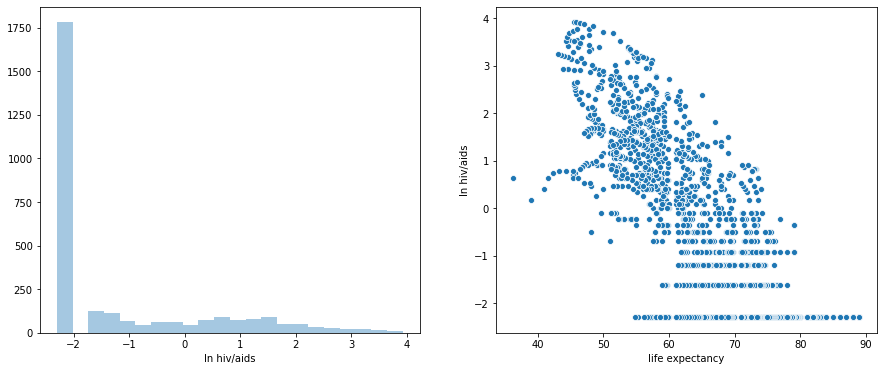

In [39]:
make_log('hiv/aids')
explore('ln hiv/aids')

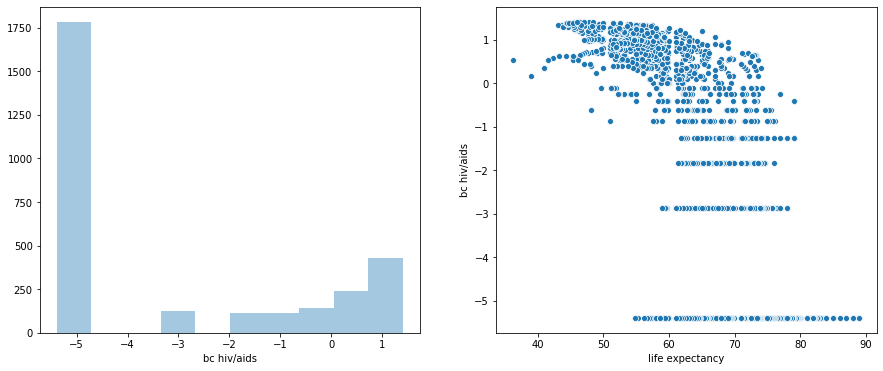

In [40]:
df['bc hiv/aids'],_ = boxcox(df['hiv/aids'])
explore('bc hiv/aids')

In [41]:
df.columns


Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling',
       'ln infant deaths', 'bc infant deaths', 'ln alcohol', 'sqrt alcohol',
       'bc alcohol', 'bc hepatitis b', 'ln under-five deaths',
       'bc under-five deaths', 'ln hiv/aids', 'bc hiv/aids'],
      dtype='object')

In [66]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

col_list = ['infant deaths', 'ln infant deaths', 'bc infant deaths', 'alcohol', 
            'ln alcohol', 'sqrt alcohol', 'bc alcohol', 'hepatitis b', 'bc hepatitis b', 
            'ln hiv/aids', 'bc hiv/aids']

for col in col_list:
    jb = jarque_bera(df[col].dropna())
    nt = normaltest(df[col].dropna())
    print('Normality testing for {}:'.format(col.title()))
    print('--------------- Jarque-Bera ----------------')
    print('T-statistic: {}'.format(round(jb[0],2)) + '\t' + '\t'*(round(jb[0],2) < 10000000) + 'P-value: {}'.format(round(jb[1],2) ))
    print('-------------- Normality Test --------------')
    print('T-statistic: {}'.format(round(nt[0],2)) + '\t' + '\t'*(round(nt[0],2) < 10000000) + 'P-value: {}'.format(round(nt[1],2) ))
    print('\n')

Normality testing for Infant Deaths:
--------------- Jarque-Bera ----------------
T-statistic: 1689646.59		P-value: 0.0
-------------- Normality Test --------------
T-statistic: 4539.31		P-value: 0.0


Normality testing for Ln Infant Deaths:
--------------- Jarque-Bera ----------------
T-statistic: 69.76		P-value: 0.0
-------------- Normality Test --------------
T-statistic: 88.88		P-value: 0.0


Normality testing for Bc Infant Deaths:
--------------- Jarque-Bera ----------------
T-statistic: 223.56		P-value: 0.0
-------------- Normality Test --------------
T-statistic: 10065.76		P-value: 0.0


Normality testing for Alcohol:
--------------- Jarque-Bera ----------------
T-statistic: 232.63		P-value: 0.0
-------------- Normality Test --------------
T-statistic: 371.19		P-value: 0.0


Normality testing for Ln Alcohol:
--------------- Jarque-Bera ----------------
T-statistic: 899.43		P-value: 0.0
-------------- Normality Test --------------
T-statistic: 537.81		P-value: 0.0


Normality tes

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  from ipykernel import kernelapp as app
